<a href="https://colab.research.google.com/github/TheNewLearn/BDM_project/blob/main/bigdata_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get -y install openjdk-8-jre-headless
!pip install pyspark
!pip install pandas
from pyspark.sql import SparkSession
from pyspark import SparkContext
from google.colab import drive
from pyspark import SparkConf
from pyspark.sql import SQLContext
spark = SparkSession.builder.master("local").getOrCreate()
sc = SparkContext.getOrCreate()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libnss-mdns fonts-dejavu-extra fonts-ipafont-gothic fonts-ipafont-mincho
  fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jre-headless
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 28.2 MB of archives.
After this operation, 104 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u312-b07-0ubuntu1~18.04 [28.2 MB]
Fetched 28.2 MB in 3s (10.5 MB/s)
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u312-b07-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
Setting up openjdk-8-jre-headless:amd64 (8u312-b07-0ubunt

In [ ]:
drive.mount("/content/drive")
netfixpath = "/content/drive/My Drive/netflix_titles.csv"
disneypath = "/content/drive/My Drive/disney_plus_titles.csv"

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
sqlContext = SQLContext(sc)
netfixdata = sqlContext.read.format("csv").options(header=True, inferSchema='True', quotes="\"",escape="\"").load(netfixpath);
netfixdata.count()

disneydata = sqlContext.read.format("csv").options(header=True, inferSchema='True', quotes="\"",escape="\"").load(disneypath);
disneydata.count()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning:

Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.



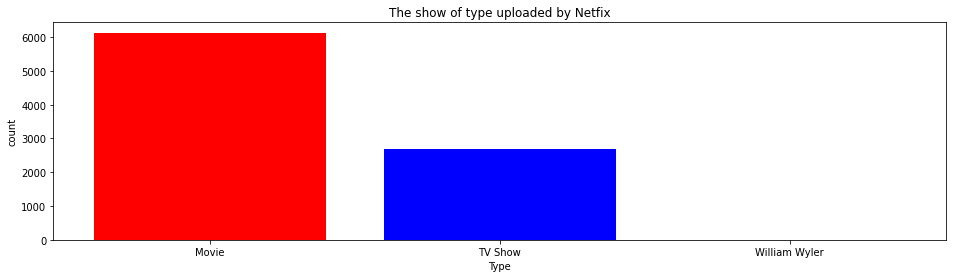

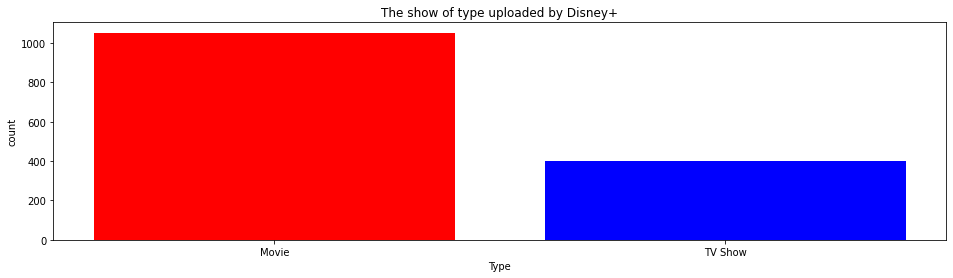

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

nefix_type = netfixdata.rdd.filter(lambda x: x[1] != None).map(lambda x:(x[1],1)).reduceByKey(lambda x,y: x+y)


disney_type = disneydata.rdd.filter(lambda x: x[1] != None).map(lambda x:(x[1],1)).reduceByKey(lambda x,y: x+y)

def gettype(ls,mode):
  tls = []
  if mode == 1:
    for i in range(len(ls)):
      tls.append(ls[i][0])
  elif mode == 2:
    for i in range(len(ls)):
      tls.append(ls[i][1])
  return tls


count = gettype(nefix_type.collect(),2)
name = gettype(nefix_type.collect(),1)

discount = gettype(disney_type.collect(),2)
disname = gettype(disney_type.collect(),1)


x = np.arange(len(name))
plt.bar(x,count,color = ['red','blue','green'])
plt.xticks(x, name)
plt.xlabel('Type')
plt.ylabel('count')
plt.title('The show of type uploaded by Netfix')
plt.show()


x = np.arange(len(disname))
plt.bar(x,discount,color = ['red','blue','green'])
plt.xticks(x, disname)
plt.xlabel('Type')
plt.ylabel('count')
plt.title('The show of type uploaded by Disney+')
plt.show()


    
  

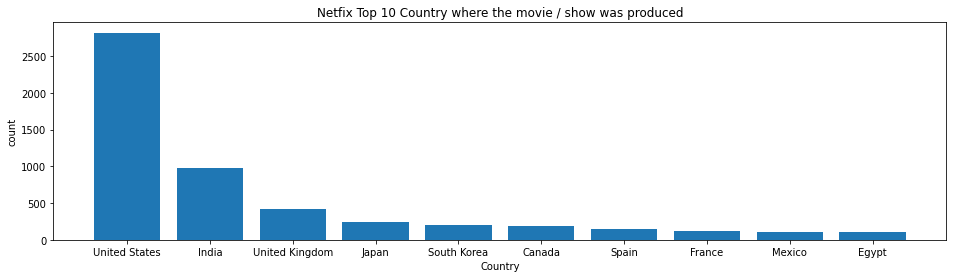

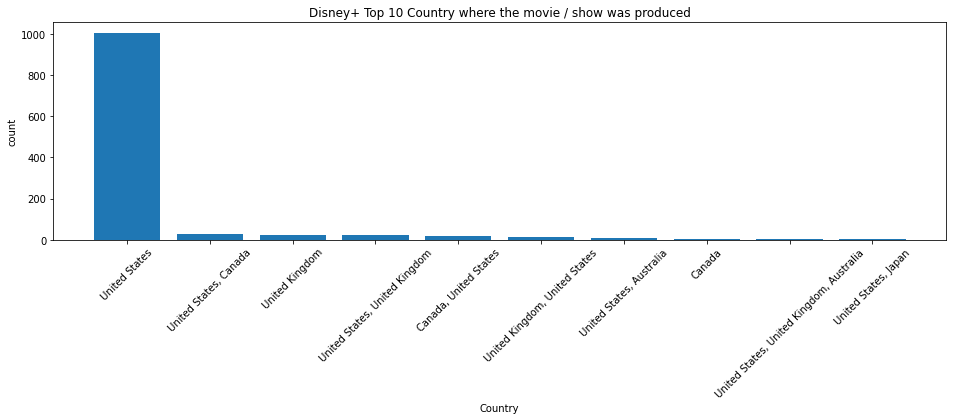

In [ ]:
n_country = netfixdata.rdd.filter(lambda x: x[5] != None ).map(lambda x:(x[5],1)).reduceByKey(lambda x,y: x+y)
n_country = sorted(n_country.collect(),key=lambda x: x[1],reverse=True)[0:10]

d_country = disneydata.rdd.filter(lambda x: x[5] != None ).map(lambda x:(x[5],1)).reduceByKey(lambda x,y: x+y)
d_country = sorted(d_country.collect(),key=lambda x: x[1],reverse=True)[0:10]


n_country_name = gettype(n_country,1)
n_country_count = gettype(n_country,2)
d_country_name = gettype(d_country,1)
d_country_count = gettype(d_country,2)

plt.rcParams["figure.figsize"] = (16,4)
x = np.arange(len(n_country_name))
plt.bar(x,n_country_count)
plt.xticks(x, n_country_name)
plt.xlabel('Country')
plt.ylabel('count')
plt.title('Netfix Top 10 Country where the movie / show was produced')
plt.show()


x = np.arange(len(d_country_name))
plt.bar(x,d_country_count)
plt.xticks(x, d_country_name,rotation=45)
plt.xlabel('Country')
plt.ylabel('count')
plt.title('Disney+ Top 10 Country where the movie / show was produced')
plt.show()


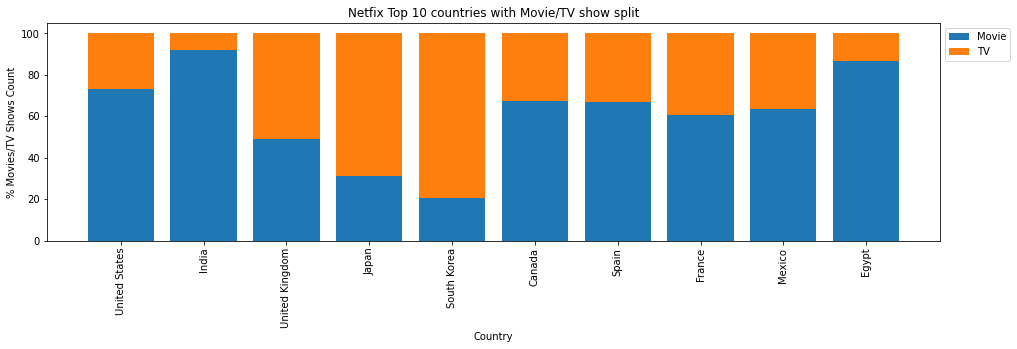

In [ ]:
c_t_n = []

for i in range(2):
  c_t_n.append([])
  for j in range(len(n_country_name)):
    result = netfixdata.rdd.filter(lambda x: x[1]==name[i] and x[5] == n_country_name[j]).map(lambda x:(x[5],1)).reduceByKey(lambda x,y: x+y)
    c_t_n[i].append(result.collect())

movie_n_c = []
tv_n_c = []
sum = []

for i in range(len(c_t_n[0])):
  result = int(c_t_n[0][i][0][1]) + int(c_t_n[1][i][0][1])
  sum.append(result)

for i in range(len(c_t_n)):
  for j in range(len(c_t_n[i])):
    if i == 0:
      movie_n_c.append((int(c_t_n[i][j][0][1])/sum[j])*100)
    else:
      tv_n_c.append((int(c_t_n[i][j][0][1])/sum[j])*100)



plt.rcParams["figure.figsize"] = (16,4)
x = np.arange(len(n_country_name))
plt.bar(x, movie_n_c, label='Movie')
plt.bar(x, tv_n_c, label='TV', bottom=movie_n_c)
plt.xticks(x, n_country_name,rotation=90)
plt.xlabel('Country')
plt.ylabel('% Movies/TV Shows Count')
plt.title('Netfix Top 10 countries with Movie/TV show split')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

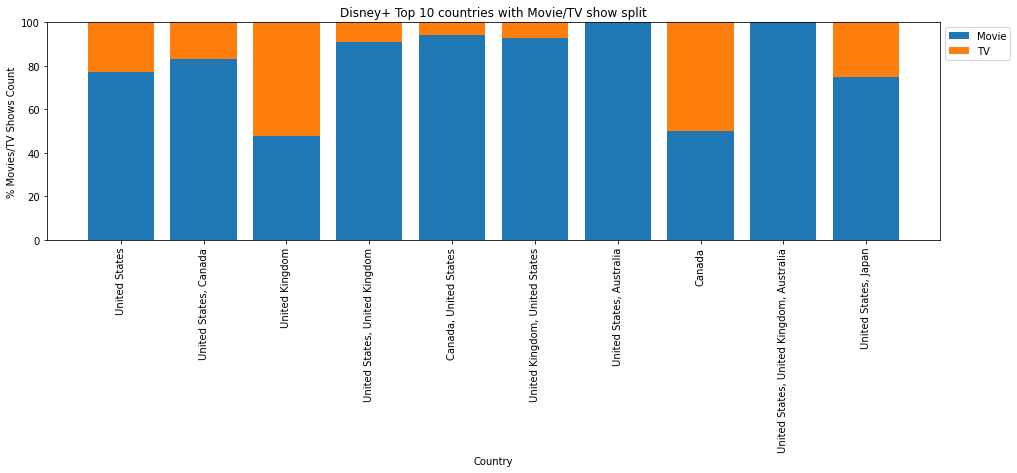

In [ ]:
movie_d_c = []
tv_d_c = []

for i in range(2):
  for j in range(len(d_country_name)):
    if i == 0:
      result = disneydata.rdd.filter(lambda x: x[1] == disname[i] and x[5] == d_country_name[j]).map(lambda x:(x[5],1)).reduceByKey(lambda x,y: x+y).collect()
      movie_d_c.append(result[0][1])
    else:
      result2 = disneydata.rdd.filter(lambda x: x[1] == disname[i] and x[5] == d_country_name[j]).map(lambda x:(x[5],1)).reduceByKey(lambda x,y: x+y).collect()
      if(len(result2)==0):
        tv_d_c.append(0)
      else:
        tv_d_c.append(result2[0][1])

d_sum = []

for i in range(len(movie_d_c)):
  d_sum.append(int(movie_d_c[i])+ int(tv_d_c[i]))

for i in range(len(movie_d_c)):
  movie_d_c[i] = (int(movie_d_c[i]) / d_sum[i])*100
  tv_d_c[i] = ((int(tv_d_c[i])/d_sum[i]))*100

x = np.arange(len(d_country_name))
plt.bar(x, movie_d_c, label='Movie')
plt.bar(x, tv_d_c, label='TV', bottom=movie_d_c)
plt.xticks(x, d_country_name,rotation=90)
plt.xlabel('Country')
plt.ylabel('% Movies/TV Shows Count')
plt.title('Disney+ Top 10 countries with Movie/TV show split')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
n_moive_year = sorted(netfixdata.rdd.filter(lambda x: x[1] == "Movie" and x[7] != None and int(x[7])>= 2007).map(lambda x:(x[7],1)).reduceByKey(lambda x,y:x+y).collect(),key=lambda x: x[0])
n_tv_year = sorted(netfixdata.rdd.filter(lambda x: x[1] == "TV Show" and x[7] != None and int(x[7])>= 2007).map(lambda x:(x[7],1)).reduceByKey(lambda x,y:x+y).collect(),key=lambda x: x[0])

d_moive_year = sorted(disneydata.rdd.filter(lambda x: x[1] == "Movie" and x[7] != None and int(x[7])>= 2007).map(lambda x:(x[7],1)).reduceByKey(lambda x,y:x+y).collect(),key=lambda x: x[0])
d_tv_year = sorted(disneydata.rdd.filter(lambda x: x[1] == "TV Show" and x[7] != None and int(x[7])>= 2007).map(lambda x:(x[7],1)).reduceByKey(lambda x,y:x+y).collect(),key=lambda x: x[0])



n_movie_year_name = sorted([int(n_moive_year[x][0]) for x in range(len(n_moive_year))])
n_movie_year_count = gettype(n_moive_year,2)
n_tv_year_name = sorted([int(n_tv_year[x][0]) for x in range(len(n_tv_year))])
n_tv_year_count = gettype(n_tv_year,2)

d_movie_year_name = sorted([int(d_moive_year[x][0]) for x in range(len(d_moive_year))])
d_movie_year_count = gettype(d_moive_year,2)
d_tv_year_name = sorted([int(d_tv_year[x][0]) for x in range(len(d_tv_year))])
d_tv_year_count = gettype(d_tv_year,2)




fig = go.Figure()

fig.add_trace(go.Scatter(
    x=  n_movie_year_name,
    y= n_movie_year_count,
    showlegend=True,
    text = n_movie_year_count, 
    name='Movie',
    marker_color='Maroon',
))



fig.add_trace(go.Scatter(
    x=  n_tv_year_name,
    y= n_tv_year_count,
    showlegend=True,
    text = n_tv_year_count, 
    name='TV Show',
    marker_color='Grey',
    
))
year = [2010,2015,2020]
fig.update_traces( mode='lines+markers')
fig.update_layout(title_text = 'Netfix Movies/TV Show release yearly Trend')
fig.update_layout(
    autosize=False,
    width=500,
    height=500,)
fig.update_xaxes(tickvals=year)
fig.show()


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=  n_movie_year_name,
    y= n_movie_year_count,
    showlegend=True,
    text = n_movie_year_count, 
    name='Movie',
    marker_color='Maroon',
))



fig.add_trace(go.Scatter(
    x=  d_tv_year_name,
    y= d_tv_year_count,
    showlegend=True,
    text = d_tv_year_count, 
    name='TV Show',
    marker_color='Grey',
    
))

fig.update_traces( mode='lines+markers')
fig.update_layout(title_text = 'Disney+ Movies/TV Show release yearly Trend')
fig.update_layout(
    autosize=False,
    width=500,
    height=500,)
fig.update_xaxes(tickvals=year)
fig.show()



In [ ]:
import plotly.express as px
n_moive_added = netfixdata.rdd.filter(lambda x: x[1] != None and x[6] != None).map(lambda x:(x[1],x[6][-4:])).collect()
d_moive_added = disneydata.rdd.filter(lambda x: x[1] != None and x[6] != None).map(lambda x:(x[1],x[6][-4:])).collect()

data = {'Type':[n_moive_added[i][0] for i in range(len(n_moive_added))],'Year':[n_moive_added[i][1] for i in range(len(n_moive_added))]}
data2 = {'Type':[d_moive_added[i][0] for i in range(len(d_moive_added))],'Year':[d_moive_added[i][1] for i in range(len(d_moive_added))]}
n_pandas = pd.DataFrame(data=data)
d_pandas = pd.DataFrame(data=data2)
fig = px.histogram(n_pandas, x="Year", color="Type")
fig.show()
fig = px.histogram(d_pandas, x="Year", color="Type")
fig.update_xaxes(tickvals=[2019,2020,2021])
fig.show()





In [ ]:
n_tv_sea = sorted(netfixdata.rdd.filter(lambda x:x[1] == "TV Show" and x[1] != None).map(lambda x:(x[9],1)).reduceByKey(lambda x,y:x+y).collect(),key=lambda x:int(x[0][0:2]))
d_tv_sea = sorted(disneydata.rdd.filter(lambda x:x[1] == "TV Show" and x[1] != None).map(lambda x:(x[9],1)).reduceByKey(lambda x,y:x+y).collect(),key=lambda x:int(x[0][0:2]))

n_tv_sea_df = pd.DataFrame(data={'Season':[n_tv_sea[i][0] for i in range(len(n_tv_sea))],'count':[n_tv_sea[i][1] for i in range(len(n_tv_sea))]})
d_tv_sea_df = pd.DataFrame(data={'Season':[d_tv_sea[i][0] for i in range(len(d_tv_sea))],'count':[d_tv_sea[i][1] for i in range(len(d_tv_sea))]})
fig = px.pie(n_tv_sea_df, values='count', names='Season', title='Netfix Durating on TV Show')
fig.show()

fig = px.pie(d_tv_sea_df, values='count', names='Season', title='Disney Durating on TV Show')
fig.show()



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download()
porter_stemmer = PorterStemmer()
n_desc_word = netfixdata.rdd.filter(lambda x:x[11] != None).map(lambda x:(x[2],x[11].split(" "))).collect()
all_name = [n_desc_word[i][0] for i in range(len(n_desc_word))]
n_desc_dict = dict()
for i in range(len(n_desc_word)):
  array = []
  for j in range(len(n_desc_word[i][1])):
    if n_desc_word[i][1][j].lower() not in stopwords.words('english'):
      n_desc_word[i][1][j] = n_desc_word[i][1][j].replace(",","")
      n_desc_word[i][1][j] = n_desc_word[i][1][j].replace(".","")
      n_desc_word[i][1][j] = n_desc_word[i][1][j].replace('"',"")
      array.append(porter_stemmer.stem(n_desc_word[i][1][j]))
  n_desc_dict.setdefault(str(n_desc_word[i][0]),array)


#n_desc_word.collect()
#print(n_desc_dict)

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [ ]:
from numpy import dot
from numpy.linalg import norm
title_name = []
for i in range(len(all_name)):
  title_name.append([])
  title_name[i].append(all_name[i])
  title_name[i].append(all_name[i].split(" "))

def find_index(str,ls):
  for i in range(len(ls)):
    if str == ls[i][0]:
      return i
      break

ec = find_index("El Cartel",title_name)
ec2 = find_index("El Cartel 2",title_name)



def findsim(l1,l2):
  name_unique = []
  for i in l1:
    if i not in name_unique:
      name_unique.append(i)
  for j in l2:
    if j not in name_unique:
      name_unique.append(j)
  v1 = [1 if x in l1 else 0 for x in name_unique]
  v2 = [1 if x in l2 else 0 for x in name_unique]
  cos = dot(v1, v2)/(norm(v1)*norm(v2))
  return cos

def recomsys(title,topk):
  recomlist = []
  relistfromdsc = []
  joinlist = []
  l1 = n_desc_dict[title]
  ec = find_index(title,title_name)
  firstcount = 0
  for i in range(len(title_name)):
    cos = findsim(title_name[ec][1],title_name[i][1])
    if cos > 0.7 and title_name[i][0] != title:
      recomlist.append([])
      recomlist[firstcount].append(title_name[i][0])
      recomlist[firstcount].append(cos)
      firstcount+=1
  scount = 0
  
  for j in all_name:
    inlist = False
    for k in range(len(recomlist)):
      if j in recomlist[k]:
          inlist = True
    if j != title and inlist==False :
      relistfromdsc.append([])
      relistfromdsc[scount].append(j)
      relistfromdsc[scount].append(findsim(l1,n_desc_dict[j]))
      scount+=1
  joinlist = recomlist + relistfromdsc
  joinlist = sorted(joinlist,key=lambda x:x[1],reverse=True)
  return joinlist[0:topk]



a = recomsys("Rocky",10)

In [ ]:
for i in a:
  print(i)

['Rocky Handsome', 0.7071067811865475]
['Rocky II', 0.7071067811865475]
['Rocky III', 0.7071067811865475]
['Rocky IV', 0.7071067811865475]
['Rocky V', 0.7071067811865475]
['The Bleeder', 0.19446111706564934]
['Grand Army', 0.17647058823529413]
['Power Players', 0.140028008402801]
['Record of Youth', 0.140028008402801]
['The Blue Planet: A Natural History of the Oceans', 0.140028008402801]


In [ ]:
import re
ns_li = netfixdata.rdd.filter(lambda x:x[10]!=None and x[2] !=None and x[1] == "Movie")\
                      .map(lambda x:([re.sub(r'([^a-zA-Z\s]+?)','',i) if i.lower() not in stopwords.words('english') else '' for i in x[2].split(" ")],x[10].split(",")))\
                      .map(lambda x: (x[0],x[1]))\
                      .flatMap(lambda x: [((x[0][i].strip(" "),x[1][j].strip(" ")),1) for i in range(len(x[0])) for j in range(len(x[1]))])\
                      .reduceByKey(lambda x,y: x+y)\
                      .collect()


In [ ]:
ns_li = sorted(ns_li,key=lambda x: x[1],reverse=True)
ns_lic = []
for i in range(len(ns_li)):
  if ns_li[i][0][0] != "":
    ns_lic.append(ns_li[i])

for i in range(len(ns_lic[0:100])):
  print(ns_lic[i])



(('Love', 'International Movies'), 69)
(('Love', 'Romantic Movies'), 60)
(('Love', 'Dramas'), 52)
(('Love', 'Comedies'), 40)
(('Christmas', 'Children & Family Movies'), 40)
(('Movie', 'International Movies'), 32)
(('Christmas', 'Comedies'), 32)
(('Man', 'International Movies'), 31)
(('Movie', 'Comedies'), 31)
(('Story', 'Documentaries'), 30)
(('Little', 'Children & Family Movies'), 27)
(('Bheem', 'Children & Family Movies'), 25)
(('Little', 'Comedies'), 24)
(('Chhota', 'Children & Family Movies'), 23)
(('Movie', 'Action & Adventure'), 22)
(('Man', 'Dramas'), 22)
(('Life', 'International Movies'), 22)
(('Movie', 'Anime Features'), 21)
(('Girl', 'Dramas'), 21)
(('Movie', 'Children & Family Movies'), 21)
(('Monster', 'Children & Family Movies'), 21)
(('Story', 'International Movies'), 21)
(('One', 'International Movies'), 21)
(('Time', 'International Movies'), 19)
(('Life', 'Dramas'), 19)
(('Time', 'Dramas'), 19)
(('Hai', 'International Movies'), 19)
(('Super', 'Children & Family Movies')

In [ ]:
ns_type = netfixdata.rdd.filter(lambda x:x[10]!= None and x[1] == "Movie").flatMap(lambda x: x[10].split(","))\
                        .map(lambda x: (x.strip(" "),1))\
                        .reduceByKey(lambda x,y:x+y)\
                        #.collect()                     
ns_type.collect()

[('Documentaries', 868),
 ('Children & Family Movies', 641),
 ('Dramas', 2427),
 ('Independent Movies', 756),
 ('International Movies', 2752),
 ('Comedies', 1674),
 ('Thrillers', 577),
 ('Romantic Movies', 616),
 ('Music & Musicals', 375),
 ('Horror Movies', 357),
 ('Sci-Fi & Fantasy', 243),
 ('Action & Adventure', 859),
 ('Classic Movies', 115),
 ('Anime Features', 71),
 ('Sports Movies', 219),
 ('Cult Movies', 71),
 ('Faith & Spirituality', 65),
 ('LGBTQ Movies', 102),
 ('Stand-Up Comedy', 343),
 ('Movies', 57)]

In [ ]:
import math
result = []
for i in range(len(ns_lic)):
  result.append([])
  result[i].append(ns_lic[i][0][0])
  result[i].append(ns_lic[i][0][1])
  for j in range(len(ns_type)):
    if ns_lic[i][0][1] == ns_type[j][0]:
      cal = ns_type[j][1]/ns_lic[i][1]
      result[i].append(math.log(cal,10))


In [ ]:
for i in range(100):
  print(result[i])

['Love', 'International Movies', 1.6007993388262183]
['Love', 'Romantic Movies', 1.0114294617807817]
['Love', 'Dramas', 1.6690664326971354]
['Love', 'Comedies', 1.6216954623292787]
['Christmas', 'Children & Family Movies', 1.204798038190855]
['Movie', 'International Movies', 1.9344984512435675]
['Christmas', 'Comedies', 1.7186054753373352]
['Man', 'International Movies', 1.9482867357292009]
['Movie', 'Comedies', 1.7323937598229684]
['Story', 'Documentaries', 1.4613984704568292]
['Little', 'Children & Family Movies', 1.3754942653598299]
['Bheem', 'Children & Family Movies', 1.4089180208467798]
['Little', 'Comedies', 1.843544211945635]
['Chhota', 'Children & Family Movies', 1.4451301935012244]
['Movie', 'Action & Adventure', 1.591570483009036]
['Man', 'Dramas', 2.0426470955097282]
['Life', 'International Movies', 2.097225748741267]
['Movie', 'Anime Features', 0.5290390539851559]
['Girl', 'Dramas', 2.0628504815980153]
['Movie', 'Children & Family Movies', 1.4846387347848982]
['Monster', '